<a href="https://colab.research.google.com/github/Alexxakiode/Time-Series-accuracy-prediction-and-forecast-for-the-next-20-heart-rate-using-Machine-Learning/blob/main/Time_series_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import statsmodels.api as sm
#from numpy import mean
import itertools
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# load the data set
# As the parameter, the file path should be provided. Additionally, GitHub URL can also be provided as follows.
df5 = pd.read_csv('/content/drive/MyDrive/AppliedAI/Assessment 1/PT_Train.csv')


In [ ]:
df5.head()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [ ]:
df5.tail()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
221,17/08/2015 18:50,159,51,NaN,NaN
222,17/08/2015 18:51,151,64,NaN,NaN
223,17/08/2015 18:52,140,64,NaN,NaN
224,17/08/2015 18:53,140,55,NaN,NaN
225,17/08/2015 18:54,138,54,NaN,NaN


In [ ]:
df5.shape

(226, 5)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [ ]:
df5.isnull()

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,False,False,False,True,True
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
221,False,False,False,True,True
222,False,False,False,True,True
223,False,False,False,True,True
224,False,False,False,True,True


In [ ]:
df5 = df5.dropna()
df5

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0
5,17/08/2015 15:14,132,41,92.0,134.0
...,...,...,...,...,...
212,17/08/2015 18:41,152,55,98.0,152.0
213,17/08/2015 18:42,152,54,97.0,142.0
214,17/08/2015 18:43,150,54,98.0,151.0
216,17/08/2015 18:45,158,53,95.0,31.0


In [ ]:
df5.dtypes

Timestamp (GMT)                object
Lifetouch Heart Rate            int64
Lifetouch Respiration Rate      int64
Oximeter SpO2                 float64
Oximeter Pulse                float64
dtype: object

In [ ]:
df5.isna().sum()

Timestamp (GMT)               0
Lifetouch Heart Rate          0
Lifetouch Respiration Rate    0
Oximeter SpO2                 0
Oximeter Pulse                0
dtype: int64

In [ ]:
#Checking for duplicated values
df5.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
212    False
213    False
214    False
216    False
217    False
Length: 191, dtype: bool

In [ ]:
df5.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,191.000000,191.000000,191.000000,191.000000
mean,2711.628272,2616.052356,83.450262,126.335079
std,12311.688863,12331.721986,29.802974,46.348142
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,134.000000
50%,140.000000,44.000000,93.000000,139.000000
75%,155.000000,52.000000,95.000000,149.000000
max,61442.000000,61442.000000,98.000000,166.000000


In [ ]:
df5.nunique()

Timestamp (GMT)               191
Lifetouch Heart Rate           41
Lifetouch Respiration Rate     31
Oximeter SpO2                  10
Oximeter Pulse                 35
dtype: int64

In [ ]:
df5['Timestamp (GMT)'].unique()

array(['17/08/2015 15:10', '17/08/2015 15:11', '17/08/2015 15:12',
       '17/08/2015 15:13', '17/08/2015 15:14', '17/08/2015 15:15',
       '17/08/2015 15:16', '17/08/2015 15:17', '17/08/2015 15:18',
       '17/08/2015 15:19', '17/08/2015 15:20', '17/08/2015 15:21',
       '17/08/2015 15:22', '17/08/2015 15:23', '17/08/2015 15:24',
       '17/08/2015 15:25', '17/08/2015 15:26', '17/08/2015 15:27',
       '17/08/2015 15:28', '17/08/2015 15:29', '17/08/2015 15:30',
       '17/08/2015 15:31', '17/08/2015 15:32', '17/08/2015 15:33',
       '17/08/2015 15:34', '17/08/2015 15:35', '17/08/2015 15:36',
       '17/08/2015 15:37', '17/08/2015 15:38', '17/08/2015 15:39',
       '17/08/2015 15:40', '17/08/2015 15:41', '17/08/2015 15:42',
       '17/08/2015 15:43', '17/08/2015 15:44', '17/08/2015 15:45',
       '17/08/2015 15:46', '17/08/2015 15:47', '17/08/2015 15:48',
       '17/08/2015 15:49', '17/08/2015 15:50', '17/08/2015 15:51',
       '17/08/2015 15:52', '17/08/2015 15:53', '17/08/2015 15:

In [ ]:
df5['Lifetouch Heart Rate'].unique()

array([  144,   140,   138,   133,   132,   136,   137,   139,   141,
         120,   135,   129, 61441, 61442,   142,   106,   143,   149,
         154,   152,   150,   148,   134,   146,   131,   151,   161,
         158,   160,   155,   153,   163,   162,   159,   166,   167,
         157,   164,   169,   170,   156])

In [ ]:
df5x = df5.drop(columns=['Lifetouch Respiration Rate','Oximeter SpO2','Oximeter Pulse'])
df5x

,Timestamp (GMT),Lifetouch Heart Rate
1,17/08/2015 15:10,144
2,17/08/2015 15:11,140
3,17/08/2015 15:12,138
4,17/08/2015 15:13,133
5,17/08/2015 15:14,132
...,...,...
212,17/08/2015 18:41,152
213,17/08/2015 18:42,152
214,17/08/2015 18:43,150
216,17/08/2015 18:45,158


In [ ]:
#There is no need to sort the value since we will be working to the timestamp
df5x.sort_values(by=['Lifetouch Heart Rate'],ascending=True )

,Timestamp (GMT),Lifetouch Heart Rate
40,17/08/2015 15:49,106
23,17/08/2015 15:32,120
29,17/08/2015 15:38,129
119,17/08/2015 17:08,131
88,17/08/2015 16:37,132
...,...,...
34,17/08/2015 15:43,61441
35,17/08/2015 15:44,61441
31,17/08/2015 15:40,61442
36,17/08/2015 15:45,61442


In [ ]:
#Converting Timestamp (GMT) to a datetime format
df5x['Timestamp (GMT)']=pd.to_datetime(df5x['Timestamp (GMT)'])
df5x.set_index('Timestamp (GMT)', inplace=True)
df5x

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:10:00,144
2015-08-17 15:11:00,140
2015-08-17 15:12:00,138
2015-08-17 15:13:00,133
2015-08-17 15:14:00,132
...,...
2015-08-17 18:41:00,152
2015-08-17 18:42:00,152
2015-08-17 18:43:00,150


In [ ]:
df5x.dtypes

Lifetouch Heart Rate    int64
dtype: object

In [ ]:
# convert Timestamp to int
df5x['Minutes'] = list(range(0, len(df5x.index)))

df5x.head()

,Lifetouch Heart Rate,Minutes
Timestamp (GMT),,
2015-08-17 15:10:00,144,0
2015-08-17 15:11:00,140,1
2015-08-17 15:12:00,138,2
2015-08-17 15:13:00,133,3
2015-08-17 15:14:00,132,4


In [ ]:
df5x.drop(df5x[df5x['Lifetouch Heart Rate']>200].index, inplace=True)
mean = df5x['Lifetouch Heart Rate'].mean()
df5x['Lifetouch Heart Rate'] = np.where (df5x['Lifetouch Heart Rate'] > 200, mean, df5x['Lifetouch Heart Rate'])

In [ ]:
df5x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2015-08-17 15:10:00 to 2015-08-17 18:46:00
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lifetouch Heart Rate  183 non-null    float64
 1   Minutes               183 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [ ]:
df5x.tail()

,Lifetouch Heart Rate,Minutes
Timestamp (GMT),,
2015-08-17 18:41:00,152.0,186
2015-08-17 18:42:00,152.0,187
2015-08-17 18:43:00,150.0,188
2015-08-17 18:45:00,158.0,189
2015-08-17 18:46:00,158.0,190


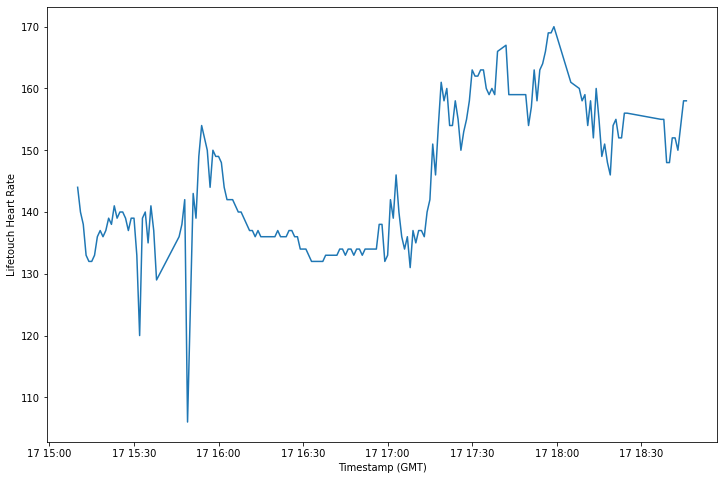

In [ ]:
# plot time series
#Because it has been set to an index, the word Timestamp (GMT) would not be uses, instead df5x.index
plt.figure(figsize=(12, 8))
plt.plot(df5x.index,df5x['Lifetouch Heart Rate'])
plt.xlabel('Timestamp (GMT)')
plt.ylabel('Lifetouch Heart Rate')
plt.show()

In [ ]:
# check stationarity of the series
def check_stationarity(series):
  statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
  print(f'p value: {p_value} ')
  print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')

In [ ]:
check_stationarity(df5x['Lifetouch Heart Rate'])

p value: 0.01 
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Log-transformation

In [ ]:
# add new column 'Log-Sales' with log transformed values
df5x['Log-Lifetouch'] = np.log(df5x['Lifetouch Heart Rate']) 

print(df5x.shape)
df5x.head(15)

(183, 3)


,Lifetouch Heart Rate,Minutes,Log-Lifetouch
Timestamp (GMT),,,
2015-08-17 15:10:00,144.0,0,4.969813
2015-08-17 15:11:00,140.0,1,4.941642
2015-08-17 15:12:00,138.0,2,4.927254
2015-08-17 15:13:00,133.0,3,4.890349
2015-08-17 15:14:00,132.0,4,4.882802
2015-08-17 15:15:00,132.0,5,4.882802
2015-08-17 15:16:00,133.0,6,4.890349
2015-08-17 15:17:00,136.0,7,4.912655
2015-08-17 15:18:00,137.0,8,4.919981


In [ ]:
# # plot time series
# plt.figure(figsize=(12, 8))
# plt.plot(df5x.index,df5x['Log-Lifetouch'])
# plt.xticks(np.arange(min(df5x['Timestamp (GMT)']), max(df5x['Timestamp (GMT)'])+1, 25)) # define x-axis step size
# plt.xlabel('Timestamp (GMT)')
# plt.ylabel('Log-Lifetouch')
# plt.show()

In [ ]:
check_stationarity(df5x['Lifetouch Heart Rate'])

p value: 0.01 
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
df5x['Deseasonalised-Lifetouch'] = df5x[['Log-Lifetouch']].diff(axis=0, periods=60)
df5x.head(62)

,Lifetouch Heart Rate,Minutes,Log-Lifetouch,Deseasonalised-Lifetouch
Timestamp (GMT),,,,
2015-08-17 15:10:00,144.0,0,4.969813,NaN
2015-08-17 15:11:00,140.0,1,4.941642,NaN
2015-08-17 15:12:00,138.0,2,4.927254,NaN
2015-08-17 15:13:00,133.0,3,4.890349,NaN
2015-08-17 15:14:00,132.0,4,4.882802,NaN
...,...,...,...,...
2015-08-17 16:15:00,136.0,65,4.912655,NaN
2015-08-17 16:16:00,136.0,66,4.912655,NaN
2015-08-17 16:17:00,136.0,67,4.912655,NaN


In [ ]:
# # plot time series
# plt.figure(figsize=(12, 8))
# plt.plot(df5x.index,df5x['Deseasonalised-Lifetouch'])
# plt.xticks(np.arange(min(df5x['Timestamp (GMT)']), max(df5x['Timestamp (GMT)'])+1, 25)) # define x-axis step size
# plt.show()

In [ ]:
check_stationarity(df5x['Deseasonalised-Lifetouch'][69:])

p value: 0.03195024592800691 
Result: The series is not stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)


In [ ]:
df5x['Differenced-Lifetouch'] = df5x[['Deseasonalised-Lifetouch']].diff(axis=0, periods=1)
df5x.head(70)

,Lifetouch Heart Rate,Minutes,Log-Lifetouch,Deseasonalised-Lifetouch,Differenced-Lifetouch
Timestamp (GMT),,,,,
2015-08-17 15:10:00,144.0,0,4.969813,NaN,NaN
2015-08-17 15:11:00,140.0,1,4.941642,NaN,NaN
2015-08-17 15:12:00,138.0,2,4.927254,NaN,NaN
2015-08-17 15:13:00,133.0,3,4.890349,NaN,NaN
2015-08-17 15:14:00,132.0,4,4.882802,NaN,NaN
...,...,...,...,...,...
2015-08-17 16:23:00,136.0,73,4.912655,0.029853,0.000000
2015-08-17 16:24:00,136.0,74,4.912655,0.022306,-0.007547
2015-08-17 16:25:00,137.0,75,4.919981,0.007326,-0.014980


In [ ]:
# # plot time series
# plt.figure(figsize=(12, 8))
# plt.plot(df5x.index,df5x['Differenced-Lifetouch'])
# plt.xticks(np.arange(min(df5x['Timestamp (GMT)']), max(df5x['Timestamp (GMT)'])+1, 25))  # define x-axis step size
# plt.show()

In [ ]:
check_stationarity(df5x['Differenced-Lifetouch'][70:])

p value: 0.1 
Result: The series is stationary 



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [ ]:
df5x.tail(20)

,Lifetouch Heart Rate,Minutes,Log-Lifetouch,Deseasonalised-Lifetouch,Differenced-Lifetouch
Timestamp (GMT),,,,,
2015-08-17 18:15:00,155.0,171,5.043425,0.087598,-0.097227
2015-08-17 18:16:00,149.0,172,5.003946,0.069472,-0.018126
2015-08-17 18:17:00,151.0,173,5.017280,0.033673,-0.035799
2015-08-17 18:18:00,148.0,174,4.997212,0.055570,0.021897
2015-08-17 18:19:00,146.0,175,4.983607,0.070952,0.015382
2015-08-17 18:20:00,154.0,176,5.036953,0.139113,0.068161
2015-08-17 18:21:00,155.0,177,5.043425,0.130770,-0.008343
2015-08-17 18:22:00,152.0,178,5.023881,0.148683,0.017913
2015-08-17 18:23:00,152.0,179,5.023881,0.103900,-0.044784


In [ ]:
# get values in column 'Timestamp (GMT)' as a numpy array
x = df5x['Lifetouch Heart Rate'].to_numpy()

print(f"Shape of data: {x.shape}")
print(x[:20])

Shape of data: (183,)
[144. 140. 138. 133. 132. 132. 133. 136. 137. 136. 137. 139. 138. 141.
 139. 140. 140. 139. 137. 139.]


In [ ]:
x

array([144., 140., 138., 133., 132., 132., 133., 136., 137., 136., 137.,
       139., 138., 141., 139., 140., 140., 139., 137., 139., 139., 133.,
       120., 139., 140., 135., 141., 137., 129., 136., 138., 142., 106.,
       143., 139., 149., 154., 152., 150., 144., 150., 149., 149., 148.,
       144., 142., 142., 142., 141., 140., 140., 139., 138., 137., 137.,
       136., 137., 136., 136., 136., 136., 136., 136., 137., 136., 136.,
       136., 137., 137., 136., 136., 134., 134., 134., 133., 132., 132.,
       132., 132., 132., 133., 133., 133., 133., 133., 134., 134., 133.,
       134., 134., 133., 134., 134., 133., 134., 134., 134., 134., 134.,
       138., 138., 132., 133., 142., 139., 146., 140., 136., 134., 136.,
       131., 137., 135., 137., 137., 136., 140., 142., 151., 146., 154.,
       161., 158., 160., 154., 154., 158., 155., 150., 153., 155., 158.,
       163., 162., 162., 163., 163., 160., 159., 160., 159., 166., 167.,
       159., 159., 154., 157., 163., 158., 163., 16

In [ ]:
# get delay embedding series
print("\nStacked data with delay embedding 2:")
X_2 = np.vstack((x[:-1], x[1:])).T
print(X_2[:5,:])

print("\nStacked data with delay embedding 3:")
X_3 = np.vstack((x[:-2], x[1:-1], x[2:])).T
print(X_3[:5,:])


Stacked data with delay embedding 2:
[[144. 140.]
 [140. 138.]
 [138. 133.]
 [133. 132.]
 [132. 132.]]

Stacked data with delay embedding 3:
[[144. 140. 138.]
 [140. 138. 133.]
 [138. 133. 132.]
 [133. 132. 132.]
 [132. 132. 133.]]


In [ ]:
u,s,v = np.linalg.svd(X_3)
print("Relative importance of each dimension for an order 3 delay embedding:")
print(s/max(s))

print("Relative importance of each dimension for an order 4 delay embedding:")
X_4 = np.vstack((x[:-3],x[1:-2],x[2:-1],x[3:])).T
u,s,v = np.linalg.svd(X_4)
print(s/max(s))

print("Relative importance of each dimension for an order 5 delay embedding:")
X_5 = np.vstack((x[:-4],x[1:-3],x[2:-2],x[3:-1],x[4:])).T
u,s,v = np.linalg.svd(X_5)
print(s/max(s))

print("Relative importance of each dimension for an order 6 delay embedding:")
X_6 = np.vstack((x[:-5],x[1:-4],x[2:-3],x[3:-2],x[4:-1],x[5:])).T
u,s,v = np.linalg.svd(X_6)
print(s/max(s))

Relative importance of each dimension for an order 3 delay embedding:
[1.         0.01654976 0.01481556]
Relative importance of each dimension for an order 4 delay embedding:
[1.         0.01627762 0.0128665  0.01281954]
Relative importance of each dimension for an order 5 delay embedding:
[1.         0.01648301 0.01207055 0.01151749 0.01128049]
Relative importance of each dimension for an order 6 delay embedding:
[1.         0.01688141 0.01170955 0.01069803 0.01033687 0.01031879]


##USE LMT LORENZ METHOD TECHNIQUES

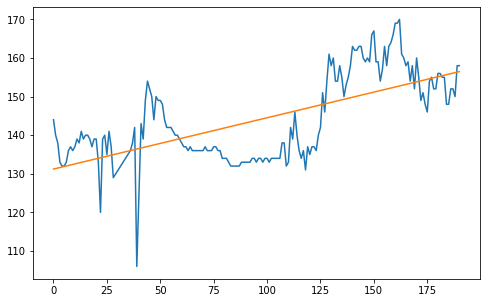

In [ ]:
# Plotting a line chart
plt.figure(figsize=(8, 5))
plt.plot(df5x['Minutes'], df5x['Lifetouch Heart Rate']) 

# fit a linear regression (trend)
m, b = np.polyfit(df5x['Minutes'], df5x['Lifetouch Heart Rate'], 1)
plt.plot(df5x['Minutes'], m * df5x['Minutes'] + b)

In [ ]:
# get values in column 'AvgTemperature' as a numpy array
x = df5x['Lifetouch Heart Rate'].to_numpy()

# get delay embedding series
X = np.vstack((x[:-2],x[1:-1],x[2:])).T
print(X.shape)

(181, 3)


In [ ]:
# get 126 entries from past record which is 70% of the entire dataset 181
past_record = X[:126,:]
print("Stacked data with delay embedding 3:")
print(past_record[-5:,:])

Stacked data with delay embedding 3:
[[161. 158. 160.]
 [158. 160. 154.]
 [160. 154. 154.]
 [154. 154. 158.]
 [154. 158. 155.]]


In [ ]:
# identify target
test = x[182] #Including prediction for the next 20minutes
print(f"\n Target to predict: {test}")


 Target to predict: 158.0


In [ ]:
# get latest data
latest = np.reshape(past_record[-1,:],(-1,3))
print(f"\n Latest observation:{latest}")


 Latest observation:[[154. 158. 155.]]


In [ ]:
# find data like most recent observation (latest)
rec = cdist(past_record[:-1], latest)
record = np.argsort(rec, axis=0)  # return indices of sorted values

print("Twenty nearest neighbors from past record:")
print(past_record[record[:5,0],:])

Twenty nearest neighbors from past record:
[[154. 161. 158.]
 [158. 160. 154.]
 [154. 154. 158.]
 [149. 154. 152.]
 [160. 154. 154.]]


In [ ]:
# standard prediction:
pred = x[record[0,0]+3]
print(f"Standard prediction: {pred}")

# average prediction:
neighbours = 2
pred2 = (1/neighbours)*sum(x[record[:neighbours,0]+3])
print(f"\nAveraged prediction: {pred2}")

Standard prediction: 160.0

Averaged prediction: 157.0


Using Moving Average as it is best for Stationarity data: but because it is more than 3 predictions, we need 20, we will not use it

In [ ]:
X = df5x.values

In [ ]:
window = 3
past_record = [X[i] for i in range(window)]

In [ ]:
test = [X[i] for i in range(window, len(X))]

In [ ]:
predictions = list()

In [ ]:
# # walk forward over time steps in test
# for t in range(len(test)):
#  length = len(past_record)
#  yhat = mean([past_record[i] for i in range(length-window,length)])

SINCE WE ARE ABLE TO MAKE IT STATIONARY, WE WILL USE A MODEL THAT WORKS ON STATIONARY DATASET

###THE ONE WITH THE LOWEST using AIC and Root Mean Square Error

AIC and RMSE 

We cannot get the R-Squared (R2) since it is not appropriate in the context of time series.

SARIMAX seems to be the best model here

In [ ]:
p = d = q = range(0, 3)

# generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# generate all different combinations of seasonal p, q and q triplets
# seasonal_pdq = [(x[0], x[1], x[2], 60) for x in list(itertools.product(p, d, q))]
seasonal_pdq = [(1, 1, 1, 60)]

for param in pdq:
    for param_seasonal in seasonal_pdq:
          mod = sm.tsa.statespace.SARIMAX(df5x['Lifetouch Heart Rate'],
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

          mod_fit = mod.fit()

          print('SARIMAX{}x{}60 - AIC:{}'.format(param, param_seasonal, mod_fit.aic))
     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check 

SARIMAX(0, 0, 0)x(1, 1, 1, 60)60 - AIC:560.3983988554382


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 0, 1)x(1, 1, 1, 60)60 - AIC:496.76842121755914


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 0, 2)x(1, 1, 1, 60)60 - AIC:444.5503993731245


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 1, 0)x(1, 1, 1, 60)60 - AIC:369.3945503235719


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 1, 1)x(1, 1, 1, 60)60 - AIC:364.30803439269994


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 1, 2)x(1, 1, 1, 60)60 - AIC:361.060310773084


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 2, 0)x(1, 1, 1, 60)60 - AIC:415.50485228885873


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 2, 1)x(1, 1, 1, 60)60 - AIC:364.32837140696614


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(0, 2, 2)x(1, 1, 1, 60)60 - AIC:357.7711977836705


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 0, 0)x(1, 1, 1, 60)60 - AIC:376.78688817616654


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 0, 1)x(1, 1, 1, 60)60 - AIC:368.2216566884084


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 0, 2)x(1, 1, 1, 60)60 - AIC:365.6481771486319


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 1, 0)x(1, 1, 1, 60)60 - AIC:369.07090639365214


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 1, 1)x(1, 1, 1, 60)60 - AIC:364.47566218532126


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 1, 2)x(1, 1, 1, 60)60 - AIC:361.43216127487676


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 2, 0)x(1, 1, 1, 60)60 - AIC:384.29065906965513


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(1, 2, 1)x(1, 1, 1, 60)60 - AIC:364.35874487640484


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 2, 2)x(1, 1, 1, 60)60 - AIC:358.6813627914583


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 0, 0)x(1, 1, 1, 60)60 - AIC:368.02063363684186


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 0, 1)x(1, 1, 1, 60)60 - AIC:369.4730194279298


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 0, 2)x(1, 1, 1, 60)60 - AIC:366.39230813379896


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 1, 0)x(1, 1, 1, 60)60 - AIC:365.4782474663293


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 1, 1)x(1, 1, 1, 60)60 - AIC:367.2906679416282


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 1, 2)x(1, 1, 1, 60)60 - AIC:362.3358738169187


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 2, 0)x(1, 1, 1, 60)60 - AIC:379.7750646558743


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX(2, 2, 1)x(1, 1, 1, 60)60 - AIC:364.93682438601536


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(2, 2, 2)x(1, 1, 1, 60)60 - AIC:360.2051905644394


In [ ]:
# specify model
model = sm.tsa.statespace.SARIMAX(df5x['Lifetouch Heart Rate'],
                                order=(0, 2, 2),
                                seasonal_order=(1, 1, 1, 60),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# train model
model_fit = model.fit(disp=0)
print(model_fit.summary())



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                      SARIMAX Results                                       
Dep. Variable:                 Lifetouch Heart Rate   No. Observations:                  183
Model:             SARIMAX(0, 2, 2)x(1, 1, [1], 60)   Log Likelihood                -173.886
Date:                              Mon, 13 Feb 2023   AIC                            357.771
Time:                                      04:47:29   BIC                            368.073
Sample:                                           0   HQIC                           361.784
                                              - 183                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1746      0.303     -3.879      0.000      -1.768      -0.581
ma.L2          0.16

In [ ]:
# make predictions
preds = model_fit.predict(start=pd.to_datetime('2015-08-17 18:15:00'), end=pd.to_datetime('2015-08-17 18:46:00'), dynamic=False)
print(preds)

Timestamp (GMT)
2015-08-17 18:15:00    167.099365
2015-08-17 18:16:00    153.704977
2015-08-17 18:17:00    155.773308
2015-08-17 18:18:00    145.999386
2015-08-17 18:19:00    143.797967
2015-08-17 18:20:00    143.516316
2015-08-17 18:21:00    154.029229
2015-08-17 18:22:00    150.255605
2015-08-17 18:23:00    157.136139
2015-08-17 18:24:00    150.830894
2015-08-17 18:25:00    156.925692
2015-08-17 18:37:00    156.151356
2015-08-17 18:38:00    154.171156
2015-08-17 18:39:00    158.597906
2015-08-17 18:40:00    151.254651
2015-08-17 18:41:00    156.519834
2015-08-17 18:42:00    147.854158
2015-08-17 18:43:00    157.963540
2015-08-17 18:45:00    159.883431
2015-08-17 18:46:00    154.323417
Name: predicted_mean, dtype: float64


In [ ]:
# calculate the RMSE
actuals = df5x['Lifetouch Heart Rate']
actuals = actuals.loc['2015-08-17 18:15:00': '2015-08-17 18:46:00' ]
print(f'Mean Squared Error: {round(np.sqrt(mean_squared_error(actuals, preds)), 2)}')

Mean Squared Error: 5.53


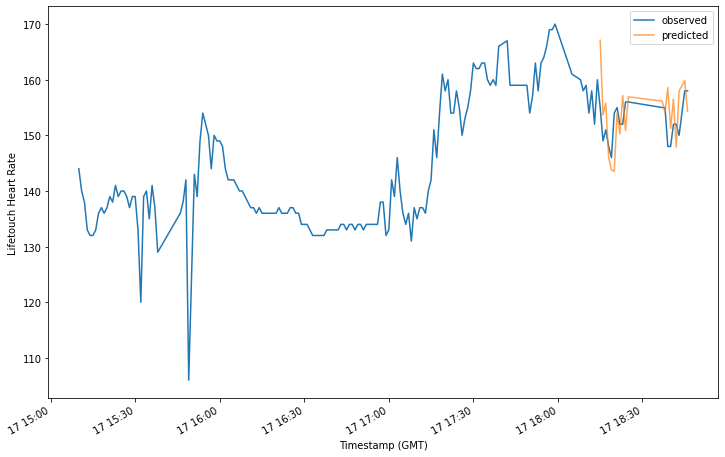

In [ ]:
# plot observations and predictions
ax = df5x['2015-08-17 15:10:00':]['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
preds.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Timestamp (GMT)')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()


In [ ]:
# Out-of-sample forecasts
forecasts = model_fit.forecast(steps=20)
print(forecasts)

183    159.629402
184    152.077291
185    151.848404
186    156.650887
187    152.294697
188    145.704842
189    149.539988
190    151.805341
191    155.776309
192    161.902325
193    160.313074
194    160.378769
195    161.618858
196    161.390193
197    157.399594
198    155.969760
199    156.946435
200    155.218384
201    164.056590
202    165.500912
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [ ]:
# plot observations and predictions
ax = df5x['Lifetouch Heart Rate'].plot(label='observed', figsize=(12, 8))
forecasts.plot(ax=ax, label='predicted', alpha=.7)

ax.set_xlabel('Timestamp (GMT)')
ax.set_ylabel('Lifetouch Heart Rate')
plt.legend()

plt.show()

ValueError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fa8bf3e7280> (for post_execute):


ValueError: ignored

ValueError: ignored

In [ ]:
import json

predictions = [137.488528, 137.368539, 139.192958, 138.561379, 137.752635, 139.097223, 136.870632, 137.849670, 137.282643, 136.613949, 136.910652, 137.549929, 137.007737, 136.234227, 138.580025, 137.841272, 136.878259, 138.391468, 136.104203, 137.053510]

data = []
for pred in predictions:
    data.append({'prediction': pred})

print(data[0:5])

submission_file_path = "submission.json"
with open(submission_file_path, 'w') as fp:
    fp.write('\n'.join(json.dumps(i) for i in data))